## Coding Exercise 1 - Image Classification Baseline Model

Load CIFAR10 Dataset

In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Visualize Dataset

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

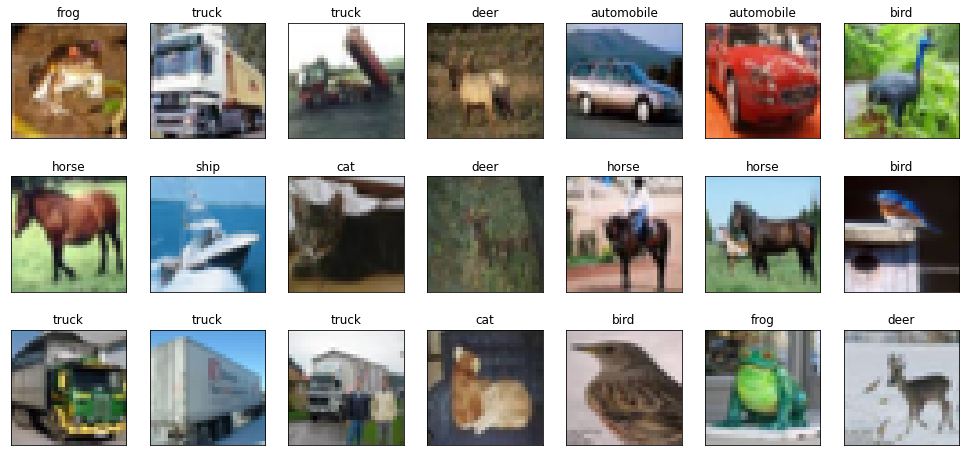

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

Convert to Greyscale

In [ ]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train]) 
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])

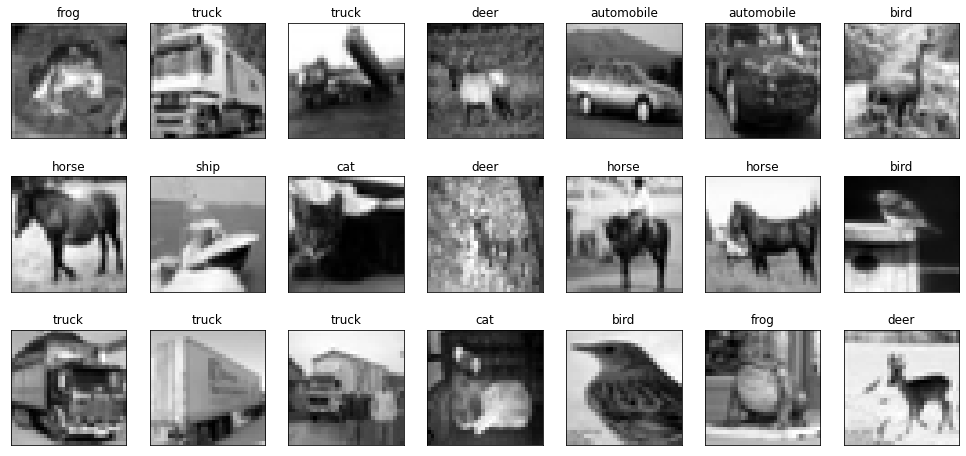

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

Normalize pixel values between 0 and 1

In [ ]:
# normalize pixel values
X_train  = X_train/255
X_test  = X_test/255

In [ ]:
X_train.shape # 50000 images, 32x32 pixels

(50000, 32, 32)

In [ ]:
X_train_flattened = X_train.reshape(X_train.shape[0],-1) # 
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [ ]:
X_train_flattened.shape

(50000, 1024)

Select Automobile and Truck Samples

In [ ]:
import pandas as pd
df = pd.DataFrame(X_train_flattened)

In [ ]:
df['label'] = y_train

In [ ]:
df2_train = df.loc[(df['label'] == 1) | (df['label'] == 9)]

In [ ]:
# validation or test data
df_test = pd.DataFrame(X_test_flattened)
df_test['label'] = y_test
df2_test = df_test.loc[(df_test['label'] == 1) | (df_test['label'] == 9)] # .loc = location, select rows based on condition

In [ ]:
df2_test.shape

(2000, 1025)

In [ ]:
y = df2_train['label']
X = df2_train.drop(columns = 'label')

Train and Evaluate Logistic Regression Model

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X, y) # ONLY FIT ON TRAINING DATA

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
score1 = model.score(X, y)
score1

0.7051

In [ ]:
y_test = df2_test['label']
X_test = df2_test.drop(columns = 'label')
score2 = model.score(X_test, y_test)
score2

0.6545

## Coding Expercise 2 - Concise Car and Truck Dataset

Load dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vehicle_2class_version2.csv to vehicle_2class_version2.csv


In [ ]:
import pandas as pd
raw_data = pd.read_csv("vehicle_2class_version2.csv", header = None)
raw_data.values.shape

(100, 5)

Split Dataset

In [ ]:
import numpy as np
raw_data = raw_data.values
np.random.shuffle(raw_data)

# split your data into training and validation
X_train = raw_data[0:80,:4]
y_train = raw_data[0:80,4:5].astype(int)
X_val = raw_data[80:,:4]
y_val = raw_data[80:,4:5].astype(int)

print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)
print(X_val.shape, y_val.shape)
print(X_val.dtype, y_val.dtype)

(80, 4) (80, 1)
float64 int64
(20, 4) (20, 1)
float64 int64


Train and Evaluate Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
score1 = model.score(X_train, y_train)
score1

0.975

In [ ]:
score2 = model.score(X_val, y_val)
score2

0.85